In [1]:
"""
k-means clustering on Iris dataset
"""

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
iris = pd.read_csv("Datasets/iris.csv")

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Take all the entries of columns 0, 1, 2, 3 - everything that leads to a prediction of what species the iris is

x = iris.iloc[:, [0,1,2,3]].values

In [4]:
# Group data into 3 clusters and predict label

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(x)

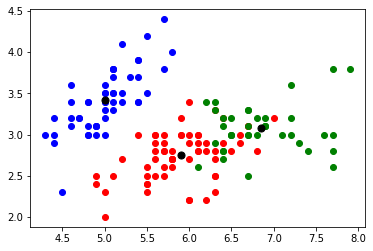

In [5]:
# Visualising the clusters - the first column and second column by their cluster and centroids

# Plot everything in column 0 that has a label of 0 against everything in column 1 that has a label of 0 etc.

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'black', label = 'Centroids')

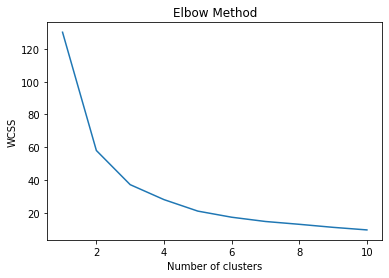

In [6]:
"""
Elbow method to determine k. 

kmeans.inertia_ gives how internally coherent the clusters are (i.e how compact they are - the lower the better). 

Running kmeans against 0-10 nodes and finding the lowest within cluster sum of squares.
"""

from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = iris.iloc[:,[0,1]]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Optimal number is 3

For no of clusters = 2  The average silhouette_score is : 0.4635854719215509
For no of clusters = 3  The average silhouette_score is : 0.4434693231245127
For no of clusters = 4  The average silhouette_score is : 0.4238012747377835
For no of clusters = 5  The average silhouette_score is : 0.40933538841198525
For no of clusters = 6  The average silhouette_score is : 0.3941900219861718
For no of clusters = 7  The average silhouette_score is : 0.3975662987277768
For no of clusters = 8  The average silhouette_score is : 0.39375707750076155
For no of clusters = 9  The average silhouette_score is : 0.3851808978778546


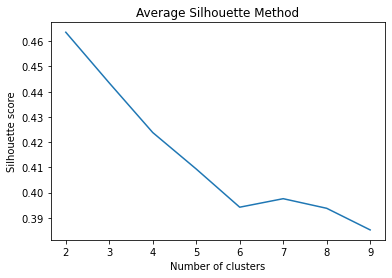

In [7]:
"""
Silouette Width
"""

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
import matplotlib.pyplot as plt

X = iris.iloc[:,[0,1]]

result=[]
no_of_clusters = range(2,10)

for n_clusters in no_of_clusters: 
  
    cluster = KMeans(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(X) 
  
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(X, cluster_labels) 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg) 
    result.append(silhouette_avg)


plt.plot(no_of_clusters,result)
plt.title('Average Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

# Quality reduces as there are more clusters